Saving tamil2.zip to tamil2.zip
User uploaded file "tamil2.zip" with length 104918 bytes


Saving tamil_binary_sentiment_1k_tweets_v1.csv to tamil_binary_sentiment_1k_tweets_v1.csv
User uploaded file "tamil_binary_sentiment_1k_tweets_v1.csv" with length 403482 bytes


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/tamil_binary_sentiment_1k_tweets_v1.csv')
df.head()

tweet sentiment
0  роЙройрпНройрпИродрпНродрпКроЯрпНроЯро╛ро▓рпН роЙройрпНройрпБро│рпНро│родрпНродрпИ роирпКро░рпБроХрпНроХрооро╛роЯрпНроЯро┐ропрпЛ!!...     Happy
1  роиродро┐ропро╛ роиродро┐ропро╛ роиропро┐ро▓рпН роиродро┐ропро╛\nтАж\nроЗроЯрпИ родро╛ройрпН роХрпКроЯро┐ропро╛ \n...     Happy
2  роЙро▒роХрпНроХроорпН ро╡ро┐ро▒рпНро▒рпБ роХройро╡рпБроХро│рпН ро╡ро╛роЩрпНроХро▓рпИропро╛?! #TamilLyric...       Sad
3  роорпАрогрпНроЯрпБроорпН роЙройрпНройрпИ роХро╛рогрпБроорпН рооройроорпЗ ... ро╡рпЗрогрпНроЯрпБроорпН роОройроХрпНроХрпЗ...       Sad
4  роЙропро┐ро░рпИ родрпКро▓рпИродрпНродрпЗройрпН роЕродрпБ роЙройрпНройро┐ро▓рпН родро╛ройрпЛ ... роЗродрпБ роиро╛ройрпН...       Sad

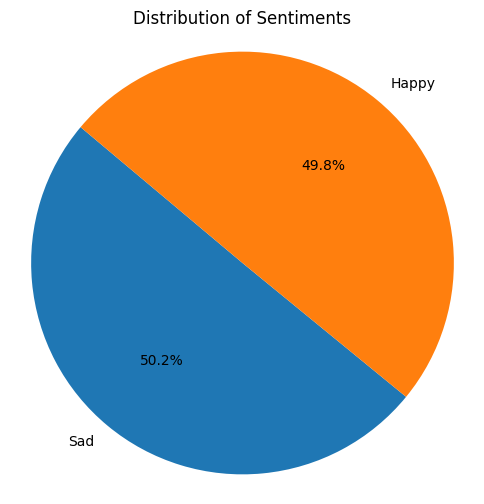

In [ ]:
sentiment_counts = df['sentiment'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiments')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [ ]:
from collections import Counter
import re

all_tweets = ' '.join(df['tweet'].astype(str).tolist())
words = re.findall(r'[^\s]+', all_tweets.lower())
word_counts = Counter(words)

top_20_words = word_counts.most_common(20)

print("Top 20 most occurring words:")
for word, count in top_20_words:
    print(f"{word}: {count}")

Top 20 most occurring words:
рокро╛роЪроорпН: 296
роОройрпН: 158
#tamillyrics: 131
роТро░рпБ: 126
родро╛ройрпН: 119
роХро╛родро▓рпН: 107
роирпА: 104
рооро┤рпИ: 99
роЕройрпНрокрпБ: 97
роЙройрпН: 91
роиро╛ройрпН: 88
тАж: 74
роЪрпЛроХроорпН: 69
роЗроирпНрод: 66
-: 57
роОройрпНрой: 54
роОройрпНро▒рпБ: 52
роЗро▓рпНро▓рпИ: 44
роЗроЪрпИ: 44
|: 44


In [ ]:
def replace(x):
  if x=='Happy':
    return 'Positive'
  else:
    return 'Negative'
df['sentiment'] = df['sentiment'].apply(replace)

In [ ]:
df = df.dropna(subset=["tweet"])


In [ ]:
import unicodedata

df["tweet"] = df["tweet"].apply(lambda x: unicodedata.normalize("NFC", str(x).strip()))

In [ ]:
import re

import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#\w+", "", text)
    text = re.sub(r"[^\u0B80-\u0BFF\s]", " ", text)
    return " ".join(text.split())

df["tweet_clean"] = df["tweet"].apply(clean_text)

changed_rows = df[df["tweet"] != df["tweet_clean"]]

for idx, row in changed_rows.iterrows():
    print(f"\nRow {idx}:")
    print("Original:", row["tweet"])
    print("Cleaned :", row["tweet_clean"])




Row 0:
Original: роЙройрпНройрпИродрпНродрпКроЯрпНроЯро╛ро▓рпН роЙройрпНройрпБро│рпНро│родрпНродрпИ роирпКро░рпБроХрпНроХрооро╛роЯрпНроЯро┐ропрпЛ!! роОройрпНройрпИрокрпН рокрпЛро▓ рокрпЖрогрпНрогрпИрокрпНрокрпН рокро╛ро░рпНродрпНродрпБ рооропроЩрпНроХ рооро╛роЯрпНроЯро┐ропрпЛ!!  #RaOne #chammakChallo #tamilLyrics
Cleaned : роЙройрпНройрпИродрпНродрпКроЯрпНроЯро╛ро▓рпН роЙройрпНройрпБро│рпНро│родрпНродрпИ роирпКро░рпБроХрпНроХрооро╛роЯрпНроЯро┐ропрпЛ роОройрпНройрпИрокрпН рокрпЛро▓ рокрпЖрогрпНрогрпИрокрпНрокрпН рокро╛ро░рпНродрпНродрпБ рооропроЩрпНроХ рооро╛роЯрпНроЯро┐ропрпЛ

Row 1:
Original: роиродро┐ропро╛ роиродро┐ропро╛ роиропро┐ро▓рпН роиродро┐ропро╛
тАж
роЗроЯрпИ родро╛ройрпН роХрпКроЯро┐ропро╛ 
роХрпКроЯро┐ роорпЗро▓рпН роХройро┐ропро╛
#RDBurnam #HindMusic #TamilLyrics
Cleaned : роиродро┐ропро╛ роиродро┐ропро╛ роиропро┐ро▓рпН роиродро┐ропро╛ роЗроЯрпИ родро╛ройрпН роХрпКроЯро┐ропро╛ роХрпКроЯро┐ роорпЗро▓рпН роХройро┐ропро╛

Row 2:
Original: роЙро▒роХрпНроХроорпН ро╡ро┐ро▒рпНр

In [ ]:
import re

def remove_repeating_chars(text):
    return re.sub(r"(.)\1{1,}", r"\1", text)

df["tweet_normalized"] = df["tweet_clean"].astype(str).apply(remove_repeating_chars)

changed_rows = df[df["tweet"] != df["tweet_normalized"]]


In [ ]:
df_processed = df[['tweet_normalized', 'sentiment']].copy()
display(df_processed.head())

tweet_normalized sentiment
0  роЙройрпНройрпИродрпНродрпКроЯрпНроЯро╛ро▓рпН роЙройрпНройрпБро│рпНро│родрпНродрпИ роирпКро░рпБроХрпНроХрооро╛роЯрпНроЯро┐ропрпЛ роО...  Positive
1  роиродро┐ропро╛ роиродро┐ропро╛ роиропро┐ро▓рпН роиродро┐ропро╛ роЗроЯрпИ родро╛ройрпН роХрпКроЯро┐ропро╛ роХрпКроЯро┐ роо...  Positive
2  роЙро▒роХрпНроХроорпН ро╡ро┐ро▒рпНро▒рпБ роХройро╡рпБроХро│рпН ро╡ро╛роЩрпНроХро▓рпИропро╛ роХройро╡рпБроХро│рпН ро╡ро┐ро▒рпНро▒...  Negative
3  роорпАрогрпНроЯрпБроорпН роЙройрпНройрпИ роХро╛рогрпБроорпН рооройроорпЗ ро╡рпЗрогрпНроЯрпБроорпН роОройроХрпНроХрпЗ рооройроо...  Negative
4  роЙропро┐ро░рпИ родрпКро▓рпИродрпНродрпЗройрпН роЕродрпБ роЙройрпНройро┐ро▓рпН родро╛ройрпЛ роЗродрпБ роиро╛ройрпН роХро╛рог...  Negative

In [ ]:
df_processed.to_csv('normalized_text.csv', index=False)
print("DataFrame saved to normalized_text.csv")

DataFrame saved to normalized_text.csv
